<a href="https://colab.research.google.com/github/nishJay/Scripting-Lab-Codes/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python for Data Science Part B Q3

Load the Titanic dataset into one of the data structures (NumPy or
Pandas) and perform the following operations.


a. Display header rows and description of the loaded dataset.


b. Remove unnecessary features (E.g. drop unwanted columns) from the dataset.


c. Manipulate data by replacing empty column values with a default value.


d. Perform the following visualizations on the loaded dataset:

• Passenger status (Survived/Died) against Passenger Class

• Survival rate of male vs female

• No of passengers in each age group

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

Documentations 

[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)


Reading the file from 'train.csv' into variable 'tt' with pandas

In [133]:
tt = pd.read_csv('https://raw.githubusercontent.com/nishJay/Scripting-Lab-Codes/main/titanic/train.csv')

a. Display header rows and description of the loaded dataset.

In [134]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Changing the entries into strings for better readability in 'Survived' column

In [136]:
tt['Survived']= tt['Survived'].map({
    0:"Died", 1:"Survived"
})
tt['Survived']

0          Died
1      Survived
2      Survived
3      Survived
4          Died
         ...   
886        Died
887    Survived
888        Died
889    Survived
890        Died
Name: Survived, Length: 891, dtype: object

Dropping unwanted columns.
[pd.drop documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop)

b. Remove unnecessary features (E.g. drop unwanted columns) from the dataset.

In [137]:
tt.drop(['Parch','Name','Ticket'], axis=1, inplace=True)
tt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,1,Died,3,male,22.0,1,7.2500,NaN,S
1,2,Survived,1,female,38.0,1,71.2833,C85,C
2,3,Survived,3,female,26.0,0,7.9250,NaN,S
3,4,Survived,1,female,35.0,1,53.1000,C123,S
4,5,Died,3,male,35.0,0,8.0500,NaN,S


c. Manipulate data by replacing empty column values with a default value.

In [138]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


Convert the Class column values to strings for easier reading

[map documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html?highlight=map#pandas.Series.map)

In [139]:

tt['Pclass'] = tt['Pclass'].map({
    1: 'Luxury Class',
    2: 'Economy Class',
    3: 'Lower Class'
})

tt['Pclass']

0        Lower Class
1       Luxury Class
2        Lower Class
3       Luxury Class
4        Lower Class
           ...      
886    Economy Class
887     Luxury Class
888      Lower Class
889     Luxury Class
890      Lower Class
Name: Pclass, Length: 891, dtype: object

c. Manipulate data by replacing empty column values with a default value.

In [140]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 62.8+ KB


In [141]:
tt = tt.fillna(tt.mean())

<ipython-input-141-c1e22b89e28e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tt = tt.fillna(tt.mean())


The Age column had null values, which has been now filled by mean value. This is called Imputation

In [142]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 62.8+ KB


d. Perform the following visualizations on the loaded dataset:

• Passenger status (Survived/Died) against Passenger Class

[Text(0.5, 1.0, 'Passenger status (Survived/Died) against Passenger Class')]

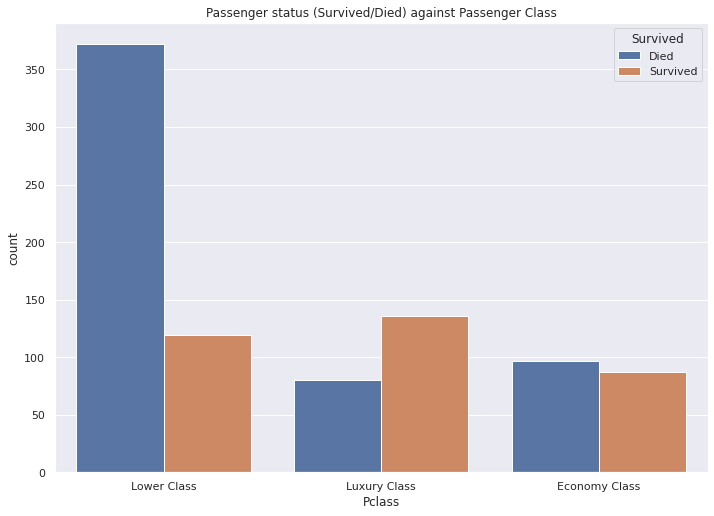

In [143]:
ax = sns.countplot(data= tt, x = 'Pclass', hue = 'Survived')
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class')

Survival rate of male vs female

[Text(0.5, 1.0, 'Survival rate of male vs female')]

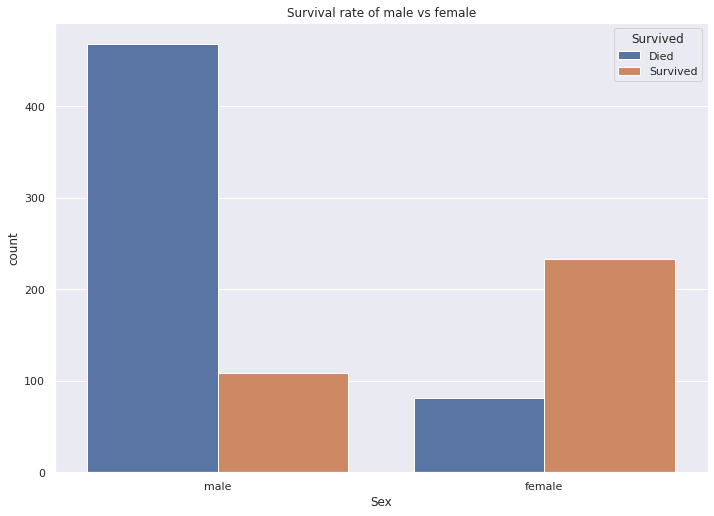

In [144]:
ax1 = sns.countplot(data= tt, x = 'Sex', hue = 'Survived')
ax1.set(title = 'Survival rate of male vs female')

No of passengers in each age group

In [145]:
tt['Age_Group'] = np.where(tt['Age']<=5,'Infants',
                           np.where(np.bitwise_and(tt['Age']>5,tt['Age']<=12),'Pre Teens',
                                    np.where(np.bitwise_and(tt['Age']>12,tt['Age']<=18),'Teens',
                                             np.where(np.bitwise_and(tt['Age']>18,tt['Age']<=29),'Young Adults',
                                                      np.where(np.bitwise_and(tt['Age']>29,tt['Age']<=59),'Middle Aged Adults',
                                                               np.where(tt['Age']>59,'Old Adults','NaN'))))))

tt['Age_Group']

0            Young Adults
1      Middle Aged Adults
2            Young Adults
3      Middle Aged Adults
4      Middle Aged Adults
              ...        
886          Young Adults
887          Young Adults
888    Middle Aged Adults
889          Young Adults
890    Middle Aged Adults
Name: Age_Group, Length: 891, dtype: object

[Text(0.5, 1.0, 'No. of passengers in each age group')]

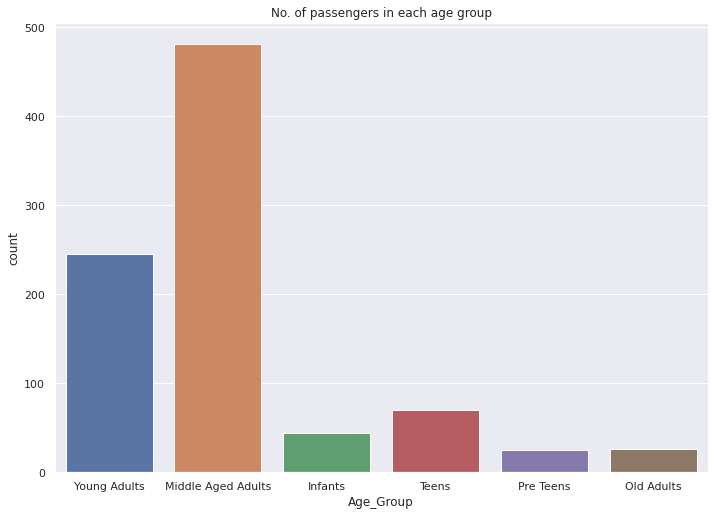

In [146]:
ax2 = sns.countplot(data = tt, x = 'Age_Group')
ax2.set(title = 'No. of passengers in each age group')